In [1]:
import numpy as np
import pandas as pd
import sys
from scipy.stats import randint

In [2]:
path='D:/timeseries/household_power_consumption/'

In [3]:
df=pd.read_csv(path+"household_power_consumption.txt",sep=';',parse_dates={'dt':['Date','Time']},na_values=['nan','?'],infer_datetime_format=True,index_col='dt',low_memory=False)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [6]:
df.shape

(2075259, 7)

In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
## finding all columns that have nan:
droping_list_all=[]
for i in df.columns:
    if df[i].isnull().sum()/len(df[i]) !=0:
        droping_list_all.append(i)
droping_list_all

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [10]:
## finding all columns that have nan:
# droping_list_all=[]
# for j in range(0,7):
#     if not df.iloc[:, j].notnull().all():
#         droping_list_all.append(j)        
#         #print(df.iloc[:,j].unique())
# droping_list_all

In [11]:
# filling nan with mean in any columns
for i in df.columns:
    df.loc[:,i]=df.loc[:,i].fillna(df.loc[:,i].mean())

In [12]:
df.isnull().sum()/len(df)

Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64

# Data ViZ

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

##  Below I resample over day, and show the sum and mean of Global_active_power. It is seen that mean and sum of resampled data set, have similar structure.

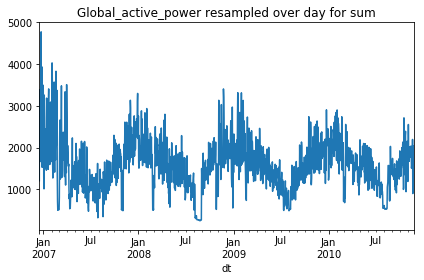

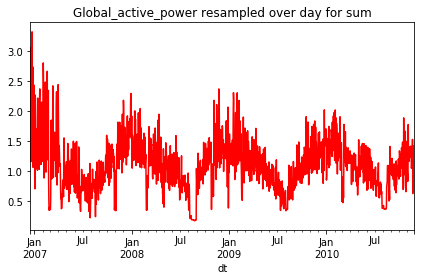

In [24]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show() 
df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for sum',color='red') 
plt.tight_layout()
plt.show() 

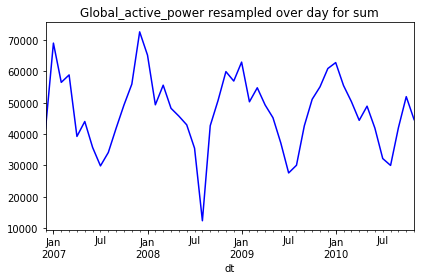

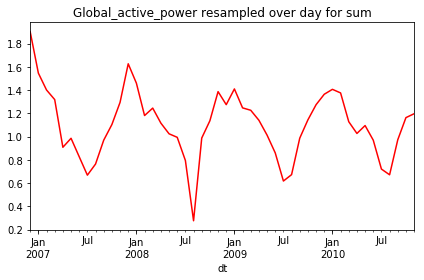

In [25]:
df.Global_active_power.resample('M').sum().plot(title='Global_active_power resampled over day for sum',color='blue') 
plt.tight_layout()
plt.show()  
df.Global_active_power.resample('M').mean().plot(title='Global_active_power resampled over day for sum',color='red') 
plt.tight_layout()
plt.show()

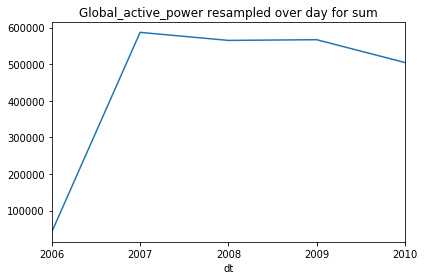

In [16]:
df.Global_active_power.resample('Y').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show() 

In [19]:
# ['Global_active_power',
#  'Global_reactive_power',
#  'Voltage',
#  'Global_intensity',
#  'Sub_metering_1',
#  'Sub_metering_2',
#  'Sub_metering_3']

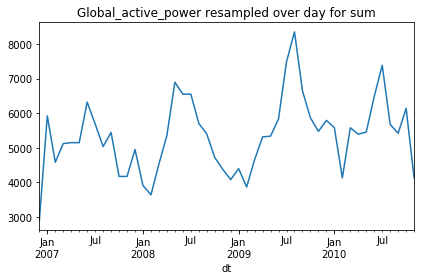

In [22]:
df.Global_reactive_power.resample('M').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show() 

In [18]:
Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64

SyntaxError: invalid syntax (<ipython-input-18-16e33c205b9a>, line 1)

In [29]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = df.Global_intensity.resample('M').agg(['mean', 'std'])
r.head()

,mean,std
dt,,
2006-12-31,8.029338,5.955750
2007-01-31,6.546829,5.459470
2007-02-28,5.914505,5.540099
2007-03-31,5.572958,5.401485
2007-04-30,3.894800,3.995231


In [31]:
type(r)

pandas.core.frame.DataFrame

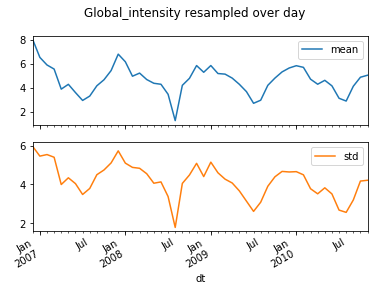

In [30]:
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

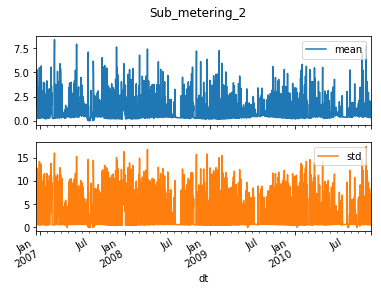

In [36]:
p=df.Sub_metering_2.resample('D').agg(['mean','std']) 
p.plot(subplots=True,title='Sub_metering_2')
plt.show()

In [ ]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

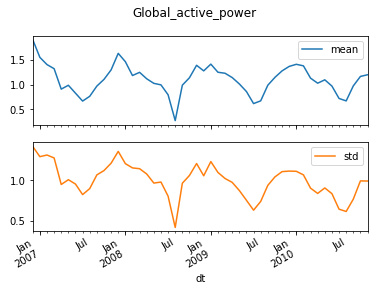

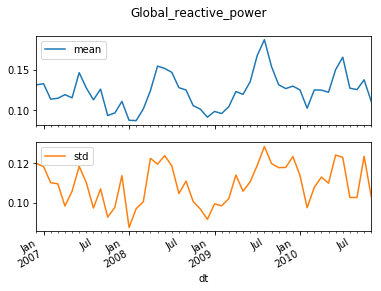

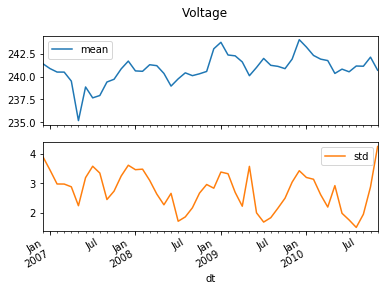

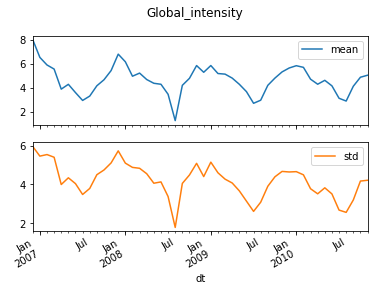

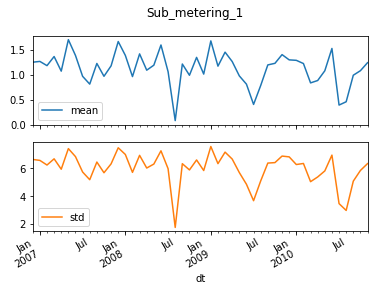

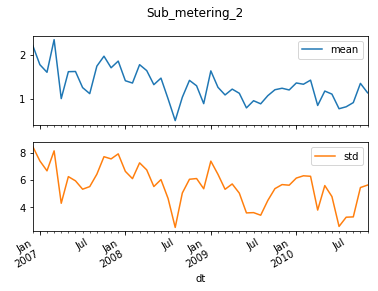

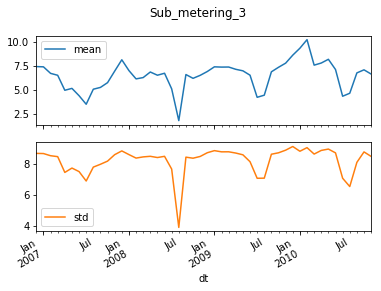

In [42]:
### plot the subplot for each of columns resample over the month 
for i in df.columns:
    r=df[i].resample('M').agg(['mean', 'std'])
    r.plot(subplots=True,title=i)
    plt.show()

In [72]:
(len(df.columns))

7

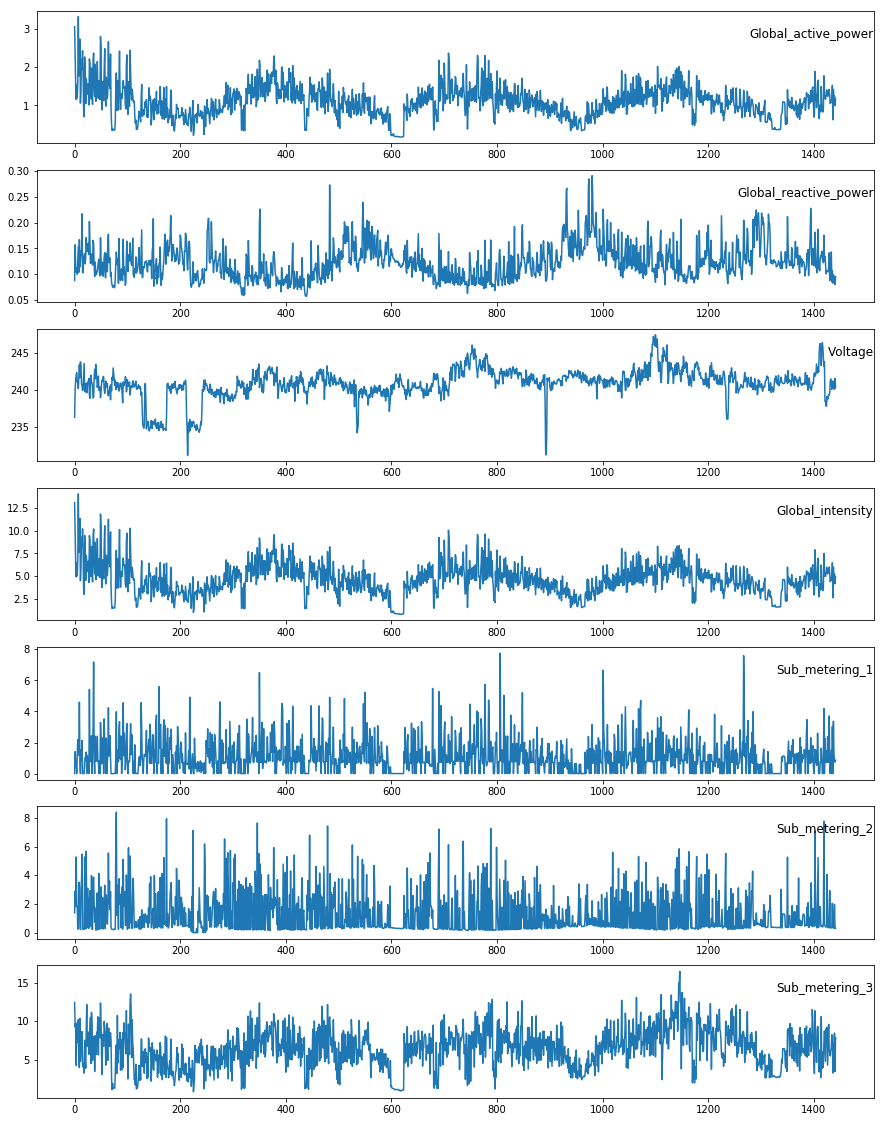

In [86]:
# Below I compare the mean of different featuresresampled over day. 
j=1
values=df.resample('D').mean().values
plt.figure(figsize=(15,20))
for i in range(len(df.columns)):
    plt.subplot((len(df.columns)),1,j)
    plt.plot(values[:, i])
    plt.title(df.columns[i],y=0.75,loc='right')
    j+=1
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'set_color_cycle'

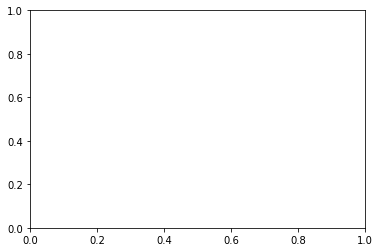

In [89]:
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'yellow', 'brown', 'green','orange','blue'])
for i in range(1, 6):
    plt.plot(x, i * x + i, label='$y = {i}x + {i}$'.format(i=i))
plt.legend(loc='best')
plt.show()

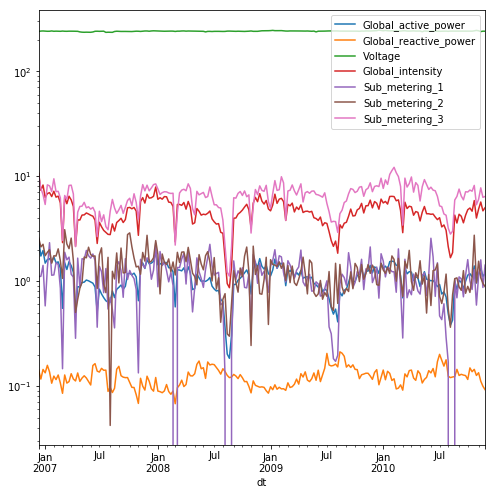

In [101]:
## resampling over week and computing mean
for i in df.columns:
    df[i].resample('W').mean().plot(legend=True,logy=True,figsize=(8,8))

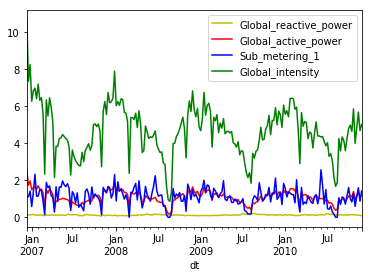

In [102]:
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

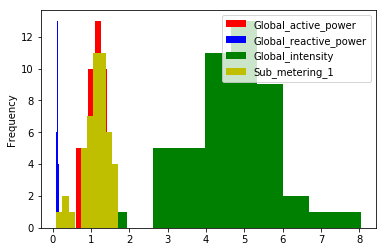

In [105]:
# Below I show hist plot of the mean of different feature resampled over month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

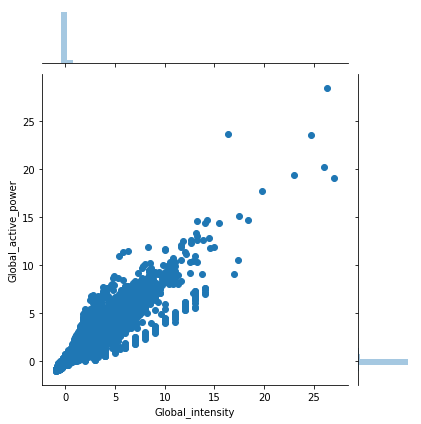

In [113]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  
plt.show()

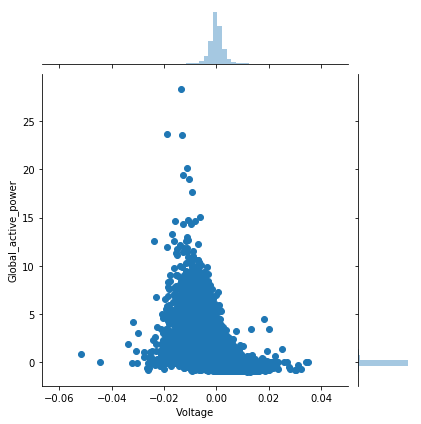

In [116]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

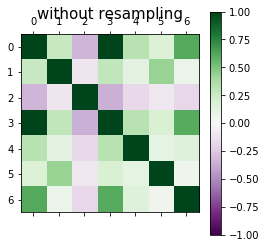

In [117]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

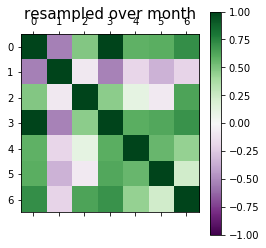

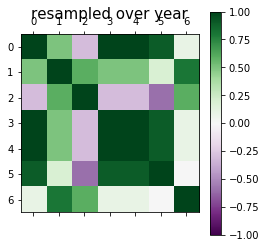

In [118]:
# Correlations of mean of features resampled over months
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

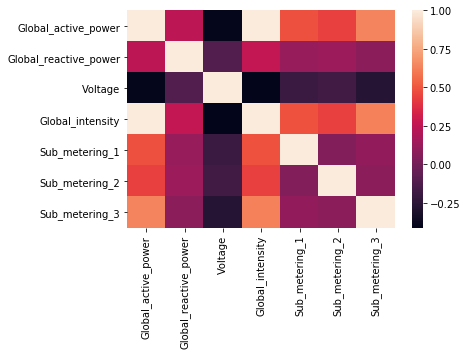

In [115]:
sns.heatmap(df.corr())

In [119]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## LSTM Data Preparation and feature engineering

### I will apply recurrent nueral network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data.  
### I will frame the supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step.

In [121]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [229]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [230]:
from sklearn.preprocessing import MinMaxScaler

In [231]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [232]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [233]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723


In [234]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


In [235]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418,0.545045
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.509006
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.488550
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.455597
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.322555


In [236]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :] 
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


In [237]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [238]:
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [239]:
print((train_X.shape[1], train_X.shape[2]))

(1, 7)


In [240]:
# model = Sequential()
# model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.2))
# #    model.add(LSTM(70))
# #    model.add(Dropout(0.3))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

<b>Model architecture</b><br>
The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer.<br> 
The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.<br>
The second parameter is return_sequences, which is set to true since we will add more layers to the model.<br>
<b>Create Dense Layer</b><br>
To make our model more robust, we add a dense layer at the end of the model.<br>
The number of neurons in the dense layer will be set to 1 since we want to predict a single value in the output.

In [241]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [242]:
nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = nadam, loss = 'mean_squared_error')

In [243]:
print(train_X.shape[1], train_X.shape[2])

1 7


In [244]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 1, 50)             11600     
_________________________________________________________________
dropout_36 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_37 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_38 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 50)                20200     
__________

In [245]:
# fit network
history = model.fit(train_X, train_y, epochs=120, batch_size=80, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 25828 samples
Epoch 1/120
 - 7s - loss: 0.0215 - val_loss: 0.0130
Epoch 2/120
 - 2s - loss: 0.0120 - val_loss: 0.0120
Epoch 3/120
 - 2s - loss: 0.0110 - val_loss: 0.0113
Epoch 4/120
 - 2s - loss: 0.0108 - val_loss: 0.0101
Epoch 5/120
 - 2s - loss: 0.0106 - val_loss: 0.0103
Epoch 6/120
 - 2s - loss: 0.0106 - val_loss: 0.0099
Epoch 7/120
 - 2s - loss: 0.0106 - val_loss: 0.0102
Epoch 8/120
 - 2s - loss: 0.0105 - val_loss: 0.0095
Epoch 9/120
 - 2s - loss: 0.0105 - val_loss: 0.0099
Epoch 10/120
 - 2s - loss: 0.0104 - val_loss: 0.0095
Epoch 11/120
 - 2s - loss: 0.0105 - val_loss: 0.0096
Epoch 12/120
 - 2s - loss: 0.0105 - val_loss: 0.0097
Epoch 13/120
 - 2s - loss: 0.0104 - val_loss: 0.0098
Epoch 14/120
 - 2s - loss: 0.0105 - val_loss: 0.0094
Epoch 15/120
 - 2s - loss: 0.0104 - val_loss: 0.0096
Epoch 16/120
 - 2s - loss: 0.0103 - val_loss: 0.0091
Epoch 17/120
 - 2s - loss: 0.0104 - val_loss: 0.0099
Epoch 18/120
 - 2s - loss: 0.0104 - val_loss: 0.0094
Epoch 

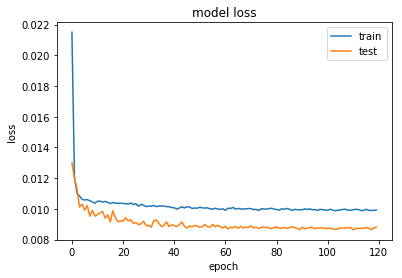

Test RMSE: 0.604


In [246]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

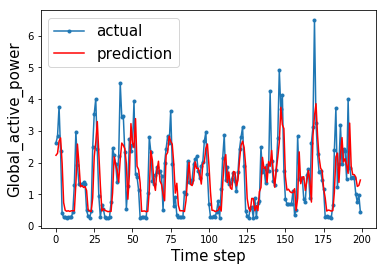

In [247]:
aa=[x for x in range(200)]
#plt.figure(figsize=(10,12))
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()